In [1]:
from mlwpy import *
%matplotlib inline

iris = datasets.load_iris()

In [2]:
(iris_train, iris_test, 
 iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris.data, iris.target,
                                                        test_size=.25)

# remove units ' (cm)' from names
iris.feature_names = [fn[:-5] for fn in iris.feature_names]

# dataframe for convenience
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

In [3]:
iris_df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa


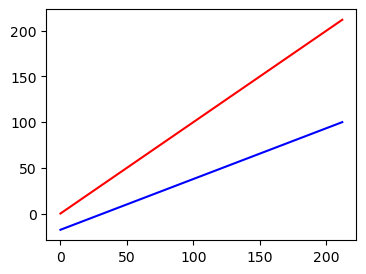

In [4]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
f_temps = np.linspace(0, 212, 100)
c_temps = (5/9) * (f_temps - 32)

plt.plot(f_temps, f_temps, 'r', # F -> F
         f_temps, c_temps, 'b'); # F -> C

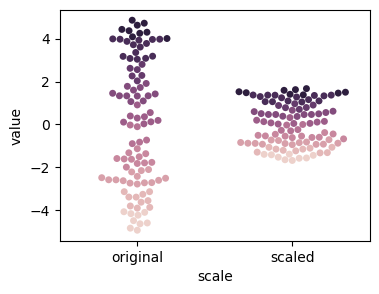

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
original = np.random.uniform(-5, 5, 100)
scaled = skpre.StandardScaler().fit_transform(original.reshape(-1,1))[:,0]
bins = np.floor(original).astype(np.uint8) + 5

df = pd.DataFrame({'original': original,
                   'scaled': scaled,
                   'hue': bins})

df = pd.melt(df, id_vars='hue', var_name='scale')

sns.swarmplot(x='scale', y='value', hue='hue', data=df).legend_.remove()

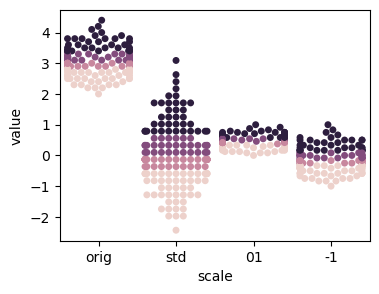

In [6]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

bins = pd.cut(iris_df['sepal width'],
             np.percentile(iris_df['sepal width'],
                          [25, 50, 75, 100])).cat.codes

df = pd.DataFrame({'orig':iris_df['sepal width'],
                  'hue':bins})

scalers = [('std', skpre.StandardScaler()),
          ('01', skpre.MinMaxScaler()),
          ('-1', skpre.MinMaxScaler((-1,1)))]

for name, scaler in scalers:
    df[name] = scaler.fit_transform(df[['orig']]).reshape(-1)
    
df = pd.melt(df, id_vars='hue', var_name='scale')
sns.swarmplot(x='scale', y='value', hue='hue', data=df).legend_.remove()

In [7]:
# discretization

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

display(iris_df.iloc[[0,50,100]])

,sepal length,sepal width,petal length,petal width,species
0,5.1000,3.5000,1.4000,0.2000,setosa
50,7.0000,3.2000,4.7000,1.4000,versicolor
100,6.3000,3.3000,6.0000,2.5000,virginica


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

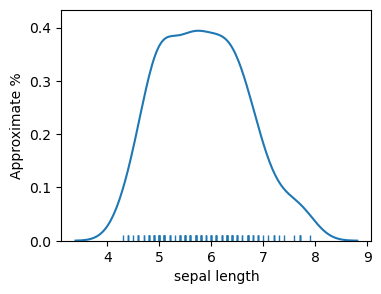

In [10]:
plt.subplots(1,1,figsize=(4,3))
ax = sns.distplot(iris_df['sepal length'], hist=False, rug=True)
ax.set_ylabel("Approximate %");

In [11]:
column = iris_df[['sepal length']] #keep 2Dness bc sk complains
col_mean = column.mean().values


both = column.copy()
both['> Mean'] = np.where(column > column.mean(), True, False)


print('Column Mean', col_mean)
display(both.iloc[[0,50,100]])

Column Mean [5.8433]


,sepal length,> Mean
0,5.1000,False
50,7.0000,True
100,6.3000,True


In [12]:
col_mean

array([5.8433])

In [13]:
iris_df[['sepal length']]

,sepal length
0,5.1000
1,4.9000
2,4.7000
3,4.6000
4,5.0000
...,...
145,6.7000
146,6.3000
147,6.5000
148,6.2000


In [14]:
column.values.shape

(150, 1)

In [15]:
(column.values.reshape(1,-1)).shape

(1, 150)

In [16]:
col_mean.shape

(1,)

In [17]:
col_mean.reshape(-1,1).shape

(1, 1)

In [18]:
new_iris_df = pd.DataFrame(iris_df, columns=['petal length', 'petal width', 'species'])


new_iris_df.columns = pd.MultiIndex([['input ftrs', 'target ftr'],
                                    new_iris_df.columns],
                                   [[1, 0, 0], [0, 1, 2]])

new_iris_df.sort_index(axis='columns', inplace=True)
display(new_iris_df.iloc[[0,50,100]])

input ftrs                       target ftr
             petal width     species         petal length
0                 0.2000      setosa               1.4000
50                1.4000  versicolor               4.7000
100               2.5000   virginica               6.0000

In [19]:
print("Numerical categories:",
     iris.target[[0,50,100]], sep='\n')

# produces sparse representation
sparse = skpre.OneHotEncoder().fit_transform(iris.target.reshape(-1,1))

print("One-hot coding:",
     sparse[[0,50,100]].todense(), sep="\n")

Numerical categories:
[0 1 2]
One-hot coding:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [20]:
encoded = pd.get_dummies(iris_df, prefix="is")
encoded.iloc[[0,50,100]]

,sepal length,sepal width,petal length,petal width,is_setosa,is_versicolor,is_virginica
0,5.1000,3.5000,1.4000,0.2000,1,0,0
50,7.0000,3.2000,4.7000,1.4000,0,1,0
100,6.3000,3.3000,6.0000,2.5000,0,0,1


In [21]:
encoded_species = pd.get_dummies(iris.target)
encoded_df = pd.merge(iris_df, encoded_species,
                     right_index=True, left_index=True)

encoded_df.iloc[[0,50,100]]

,sepal length,sepal width,petal length,petal width,species,0,1,2
0,5.1000,3.5000,1.4000,0.2000,setosa,1,0,0
50,7.0000,3.2000,4.7000,1.4000,versicolor,0,1,0
100,6.3000,3.3000,6.0000,2.5000,virginica,0,0,1


In [22]:
import patsy.contrasts as pc

levels = iris.target_names
coding = (pc.Treatment(reference=0).code_with_intercept(list(levels)))

print(coding)

ContrastMatrix(array([[1., 0., 0.],
                      [0., 1., 0.],
                      [0., 0., 1.]]),
               ['[setosa]', '[versicolor]', '[virginica]'])


In [23]:
encoded = patsy.dmatrix('species-1',
                       iris_df,
                       return_type='dataframe')

display(encoded.iloc[[0,50,100]])

,species[setosa],species[versicolor],species[virginica]
0,1.0000,0.0000,0.0000
50,0.0000,1.0000,0.0000
100,0.0000,0.0000,1.0000


In [24]:
encoded = patsy.dmatrix('species',
                       iris_df,
                       return_type='dataframe')

display(encoded.iloc[[0,50,100]])

,Intercept,species[T.versicolor],species[T.virginica]
0,1.0000,0.0000,0.0000
50,1.0000,1.0000,0.0000
100,1.0000,0.0000,1.0000


In [25]:
pet_data = pd.DataFrame({'pet' :['cat', 'cat', 'dog'],
                        'cost' :[20.0, 25.0, 40.0]})

pet_df = pd.get_dummies(pet_data)
display(pet_df)

,cost,pet_cat,pet_dog
0,20.0000,1,0
1,25.0000,1,0
2,40.0000,0,1


In [26]:
def pretty_coeffs(sk_lr_model, ftr_names):
    ' helper to display sklearn results in a nice dataframe '
    lr_coeffs = pd.DataFrame(sk_lr_model.coef_,
                            columns=ftr_names,
                            index=["Coeff"])
    
    lr_coeffs['intercept'] = sk_lr_model.intercept_
    return lr_coeffs

In [27]:
sk_tgt = pet_df['cost'].values.reshape(-1,1)
sk_ftrs = pet_df.drop('cost', axis='columns')

sk_model = (linear_model.LinearRegression(fit_intercept=False)
                        .fit(sk_ftrs, sk_tgt))

display(pretty_coeffs(sk_model, sk_ftrs.columns))

,pet_cat,pet_dog,intercept
Coeff,22.5000,40.0000,0.0000


In [28]:
import statsmodels as sm
import statsmodels.formula.api as smf

In [29]:
formula = 'cost ~ pet - 1'

sm_model = smf.ols(formula, data=pet_data).fit()
display(pd.DataFrame(sm_model.params).T)

,pet[cat],pet[dog]
0,22.5000,40.0000


In [30]:
sk_tgt = pet_df['cost'].values.reshape(-1,1)
sk_ftrs = pet_df.drop('cost', axis='columns')
sk_model = (linear_model.LinearRegression()
                        .fit(sk_ftrs, sk_tgt))

display(pretty_coeffs(sk_model, sk_ftrs.columns))

,pet_cat,pet_dog,intercept
Coeff,-8.7500,8.7500,31.2500


In [31]:
pet_data_p1 = pet_data.copy()
pet_data_p1['ones'] = 1.0

formula = 'cost ~ (pet -1) + ones'
sm_model = smf.ols(formula, data=pet_data_p1).fit()

display(pd.DataFrame(sm_model.params).T)

,pet[cat],pet[dog],ones
0,1.6667,19.1667,20.8333


In [32]:
df = pd.DataFrame({'predicted_sk' : sk_model.predict(sk_ftrs)[:,0],
                   'predicted_sm' : sm_model.predict(pet_data_p1),
                   'actual' : sk_tgt[:,0]})

display(df)

,predicted_sk,predicted_sm,actual
0,22.5000,22.5000,20.0000
1,22.5000,22.5000,25.0000
2,40.0000,40.0000,40.0000


In [33]:
display(pet_data_p1)

,pet,cost,ones
0,cat,20.0000,1.0000
1,cat,25.0000,1.0000
2,dog,40.0000,1.0000


In [35]:
print("pet - 1 coding")
print(patsy.dmatrix("pet - 1", data=pet_data_p1))

pet - 1 coding
[[1. 0.]
 [1. 0.]
 [0. 1.]]


In [36]:
print("column sum:")
full_coding = patsy.dmatrix("pet - 1",
                           data=pet_data_p1,
                           return_type='dataframe')
display(pd.DataFrame(full_coding.sum(axis='columns')))

column sum:


,0
0,1.0000
1,1.0000
2,1.0000


In [37]:
# manual feature construction w/ xor function

xor_data = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

In [38]:
xor_df = pd.DataFrame(xor_data, columns=['x1', 'x2', 'tgt'])

display(xor_df)

,x1,x2,tgt
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [39]:
model = linear_model.LogisticRegression().fit(xor_df[['x1', 'x2']],
                                             xor_df['tgt'])

model.predict(xor_df[['x1', 'x2']])

array([0, 0, 0, 0])

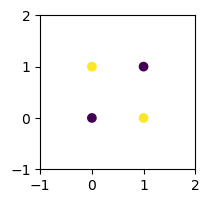

In [40]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.scatter('x1', 'x2', data=xor_df, c='tgt')
ax.set_xlim(-1,2)
ax.set_ylim(-1,2);

# this is impossible to classify w/ a single line

In [41]:
# constructing a new feature that we can use that will make it easier to separate classes

xor_df['new'] = (-1)**xor_df['x1'] * (-1)**xor_df['x2']
xor_df

,x1,x2,tgt,new
0,0,0,0,1
1,0,1,1,-1
2,1,0,1,-1
3,1,1,0,1


In [42]:
model = linear_model.LogisticRegression().fit(xor_df[['new']], xor_df['tgt'])

model.predict(xor_df[['new']])

array([0, 1, 1, 0])

In [44]:
# parameters
# degree: degree of terms
# interaction_only: no x**2, only x*y (and x,y)
# include_bias: constant term

quad_inters = skpre.PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
subset = iris_df.loc[[0,50,100], ['sepal length', 'sepal width']]
new_terms = pd.DataFrame(quad_inters.fit_transform(subset), index=[0, 50, 100])

new_terms.set_axis(['sep length', 'sep width', 'sep area'], axis=1, inplace=True)

# note: creating the interaction *also*
# includes the base terms in the interaction
display(new_terms)

,sep length,sep width,sep area
0,5.1000,3.5000,17.8500
50,7.0000,3.2000,22.4000
100,6.3000,3.3000,20.7900


In [45]:
design_df = patsy.dmatrix("Q('sepal length'):Q('sepal width') - 1",
                         data=iris_df.iloc[[0,50,100]],
                         return_type='dataframe')

design_df

,Q('sepal length'):Q('sepal width')
0,17.8500
50,22.4000
100,20.7900


In [48]:
# create areas
sepal_area = iris_df['sepal length'] * iris_df['sepal width']
petal_area = iris_df['petal length'] * iris_df['petal width']

# discretize
iris_df['big_sepal'] = sepal_area > sepal_area.median()
iris_df['big_petal'] = petal_area > petal_area.median()
display(iris_df.iloc[[0,50,100]])

,sepal length,sepal width,petal length,petal width,species,big_sepal,big petal,big_petal
0,5.1000,3.5000,1.4000,0.2000,setosa,True,False,False
50,7.0000,3.2000,4.7000,1.4000,versicolor,True,True,True
100,6.3000,3.3000,6.0000,2.5000,virginica,True,True,True


In [53]:
design_df = patsy.dmatrix("big_sepal:big_petal - 1",
                         data=iris_df.iloc[[0,50,100]],
                         return_type='dataframe')

display(design_df.iloc[:, :2])
display(design_df.iloc[:,2: ])

,big_sepal[False]:big_petal[False],big_sepal[True]:big_petal[False]
0,0.0000,1.0000
50,0.0000,0.0000
100,0.0000,0.0000


,big_sepal[False]:big_petal[True],big_sepal[True]:big_petal[True]
0,0.0000,0.0000
50,0.0000,1.0000
100,0.0000,1.0000


In [55]:
design_df = patsy.dmatrix("C(species,Treatment):Q('sepal length') - 1",
                         data=iris_df.iloc[[0,50,100]],
                         return_type='dataframe')

# breaks up the long display names
display(design_df.iloc[:,[0]])
display(design_df.iloc[:,[1]])
display(design_df.iloc[:,[2]])

,"C(species, Treatment)[setosa]:Q('sepal length')"
0,5.1000
50,0.0000
100,0.0000


,"C(species, Treatment)[versicolor]:Q('sepal length')"
0,0.0000
50,7.0000
100,0.0000


,"C(species, Treatment)[virginica]:Q('sepal length')"
0,0.0000
50,0.0000
100,6.3000


In [56]:
design_df.shape

(3, 3)

In [57]:
print(iris_df.iloc[[0,50,100]]['sepal length'])

0                   5.1000
50                  7.0000
100                 6.3000
Name: sepal length, dtype: float64


In [59]:
import statsmodels as sm
import statsmodels.formula.api as smf

design = "C(species,Treatment):petal_area"
design_matrix = patsy.dmatrix(design, data=iris_df)

lr = linear_model.LinearRegression(fit_intercept=False)

In [60]:
mod = lr.fit(design_matrix, iris_df['sepal width'])
print(mod.coef_)

[ 2.8378  1.402  -0.0034  0.0146]


In [61]:
# same results

formula = "Q('sepal width') ~ C(species,Treatment):petal_area"
res1 = smf.ols(formula=formula, data=iris_df).fit()
print(res1.params)

Intercept                                                    2.8378
C(species, Treatment)[setosa]:petal_area                     1.4020
C(species, Treatment)[versicolor]:petal_area                -0.0034
C(species, Treatment)[virginica]:petal_area                  0.0146
dtype: float64


In [64]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

area_df = pd.DataFrame({"sepal_area" : iris_df['sepal length'] * iris_df['sepal width'],
                       "petal_area" : iris_df['petal length'] * iris_df['petal width']})

In [71]:
def median_big_small(d):
    return d > np.median(d)

transformer = skpre.FunctionTransformer(median_big_small)
res = transformer.fit_transform(area_df)

print("Large areas as compared to median?")
print(res.iloc[[0,50,100]])

Large areas as compared to median?
     sepal_area  petal_area
0          True       False
50         True       False
100        True        True


In [72]:
from sklearn.base import TransformerMixin
class Median_Big_small(TransformerMixin):
    def __init__(self):
        pass
    def fit(self,ftrs,tgt=None):
        self.medians = np.median(ftrs)
        return self
    def transform(self,ftrs,tgt=None):
        return ftrs > self.medians

In [76]:
training, testing = skms.train_test_split(area_df)

transformer = Median_Big_small()
train_xform = transformer.fit_transform(training)
test_xform = transformer.fit_transform(testing)

print('train')
display(train_xform)
print('test')
(display(test_xform))

train


,sepal_area,petal_area
105,True,True
10,True,False
109,True,True
88,True,False
134,True,False
...,...,...
108,True,False
135,True,True
82,True,False
28,True,False


test


,sepal_area,petal_area
103,True,False
33,True,False
116,True,False
83,True,False
138,True,False
6,True,False
39,True,False
136,True,True
3,True,False
121,True,False


## Target Manipulations

In [78]:
x = np.linspace(1, 10, 50)
n1 = np.random.normal(size=x.shape)

comparison = pd.DataFrame({"x" : x,
                          "d1" : 2*x+5 + n1,
                          "d2" : 2*x**2+5 + n1})

comparison['x'] = x
melted = pd.melt(comparison, id_vars=['x'])

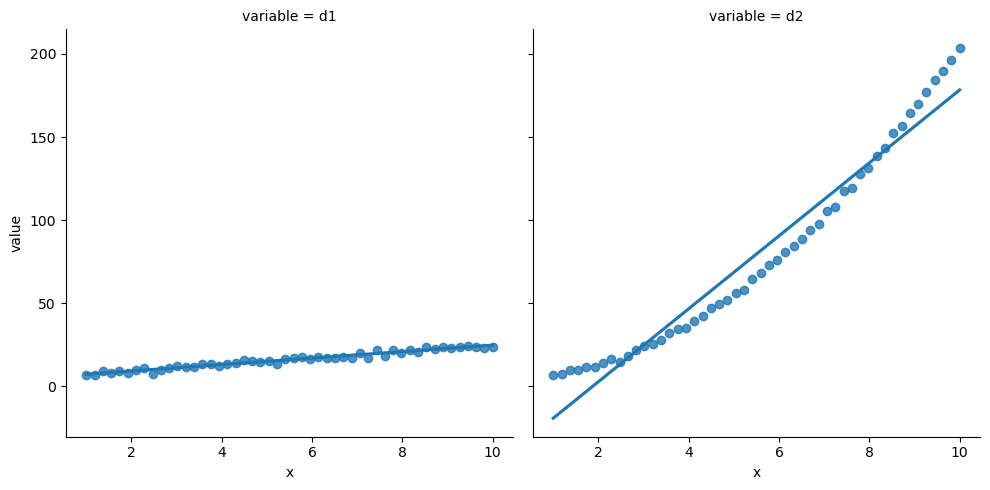

In [81]:
sns.lmplot(x='x', y='value',
          data=melted, col='variable', ci=None);

<bound method Figure.tight_layout of <Figure size 800x300 with 2 Axes>>

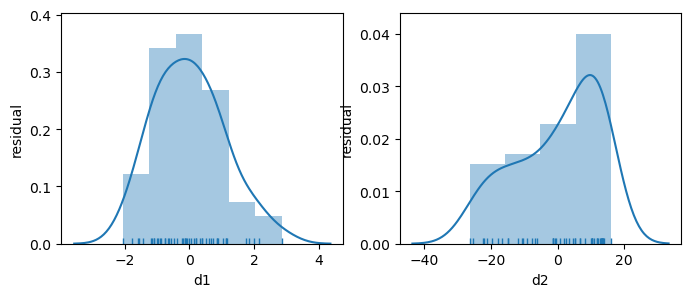

In [82]:
fig, axes = plt.subplots(1,2,figsize=(8,3))
for ax, variable in zip(axes, ['d1','d2']):
    predicted = (smf.ols("{} ~ x".format(variable), data=comparison)
                    .fit()
                    .predict())
    actual = comparison[variable]
    sns.distplot(predicted - actual, norm_hist=True, rug=True, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('residual')
    
fig.tight_layout

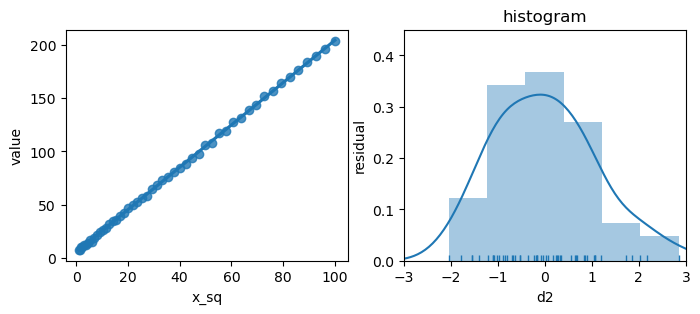

In [83]:
magic = pd.DataFrame({"d2" : 2*x**2+5+n1,
                     "x_sq" : x**2})
melted = pd.melt(magic, id_vars=['x_sq'])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
sns.regplot(x='x_sq', y='value',
           data=melted, ci=None, ax=ax1)

predicted = (smf.ols("d2 ~ x_sq", data=magic)
                .fit()
                .predict())

actual = comparison['d2']
sns.distplot(predicted - actual, rug=True,
            norm_hist=True, ax=ax2)

ax2.set_title('histogram')
ax2.set_xlim(-3,3)
ax2.set_ylim(0, .45)
ax2.set_ylabel('residual');

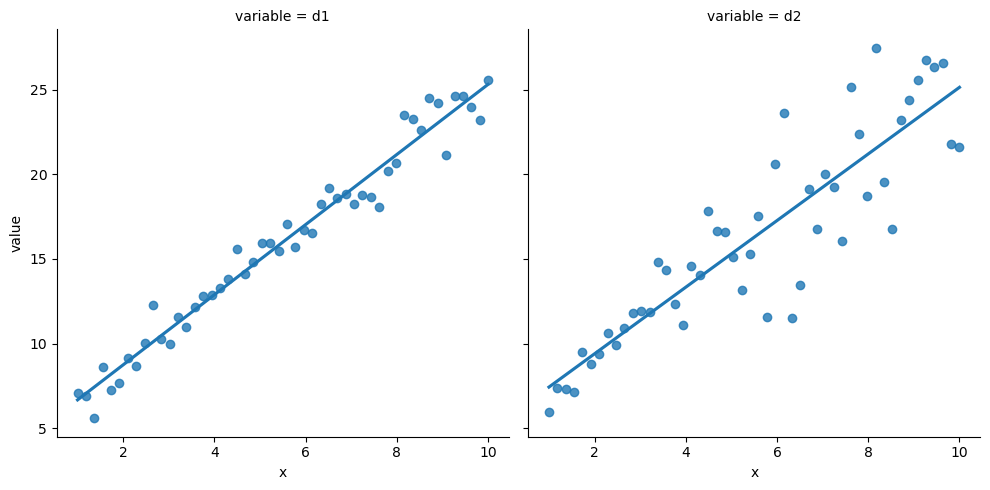

In [85]:
x = np.linspace(1,10,50)

n1 = np.random.normal(size=x.shape)
n2 = .5*x*np.random.normal(size=x.shape)

comparison = pd.DataFrame({"x" : x,
                           "d1" : 2*x+5+n1,
                           "d2" : 2*x+5+n2})

comparison['x'] = x
melted = pd.melt(comparison, id_vars=['x'])

sns.lmplot(x='x', y='value',
        data=melted, col='variable', ci=None)

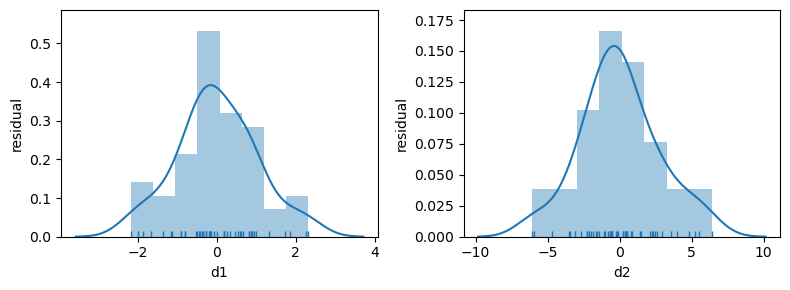

In [86]:
fig, axes = plt.subplots(1,2,figsize=(8,3))
for ax, variable in zip(axes, ['d1', 'd2']):
    predicted = (smf.ols("{} ~ x".format(variable),data=comparison)
                    .fit()
                    .predict())
    actual = comparison[variable]
    sns.distplot(predicted - actual, norm_hist=True, rug=True, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('residual')
    
fig.tight_layout()

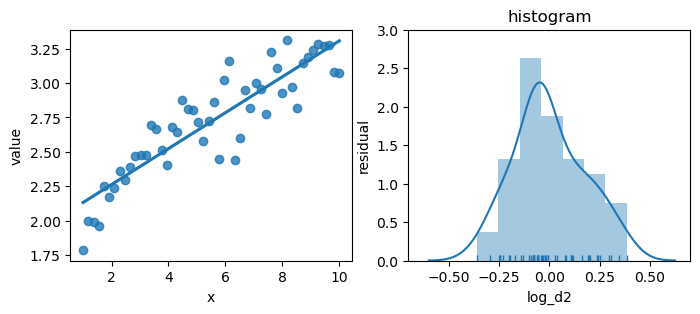

In [89]:
magic = pd.DataFrame({"log_d2" : np.log(comparison['d2']),
                      "x"      : x})
melted = pd.melt(magic, id_vars=['x'])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
sns.regplot(x='x', y='value', data=melted, ci=None, ax=ax1)

predicted = (smf.ols("log_d2 ~ x", data=magic)
                .fit()
                .predict())

actual = magic['log_d2']
sns.distplot(predicted - actual, rug=True, ax=ax2)

ax2.set_title('histogram')
ax2.set_xlim(-.7,.7)
ax2.set_ylim(0,3)
ax2.set_ylabel('residual');